**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
# IMPORTS HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [2]:
# CODE HERE
df = pd.read_csv('Data/Miles_Traveled.csv',
                 index_col='DATE',
                 parse_dates=True)
df.index.freq='MS'
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [3]:
# CODE HERE
df.columns = ['Value']

In [4]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

<AxesSubplot:xlabel='DATE'>

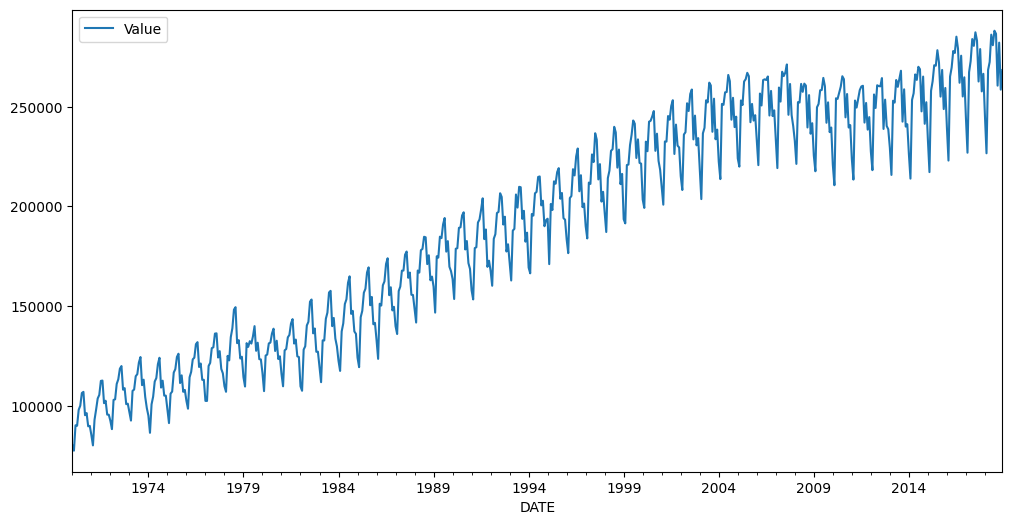

In [5]:
# CODE HERE
df.plot(figsize=(12,6))

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

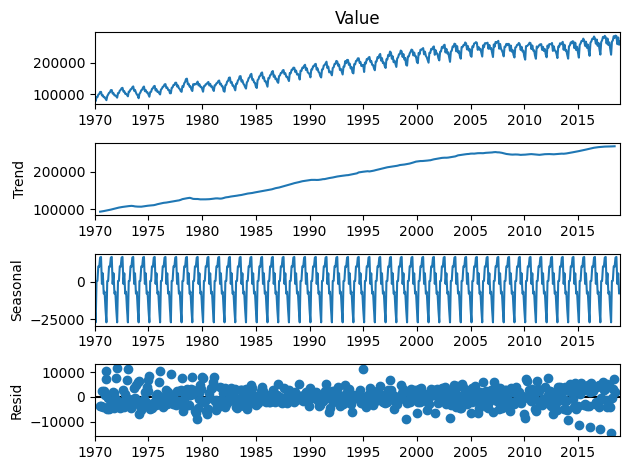

In [6]:
# CODE HERE
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['Value'])
results.plot();

<AxesSubplot:xlabel='DATE'>

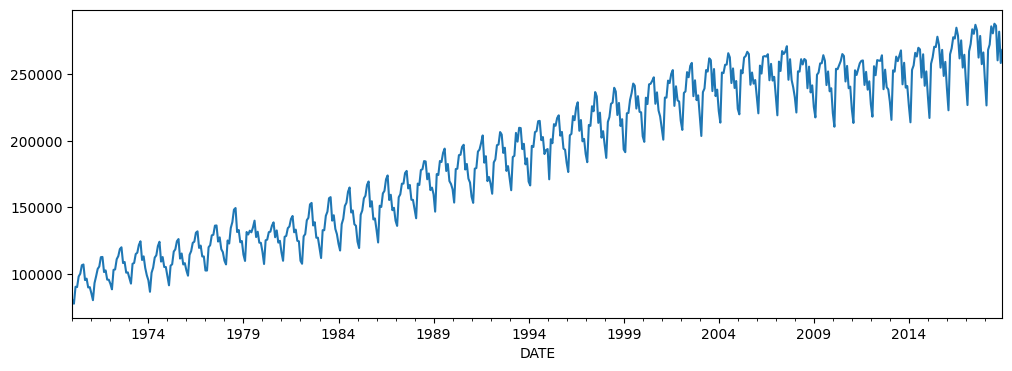

In [7]:
results.observed.plot(figsize=(12,4))

<AxesSubplot:xlabel='DATE'>

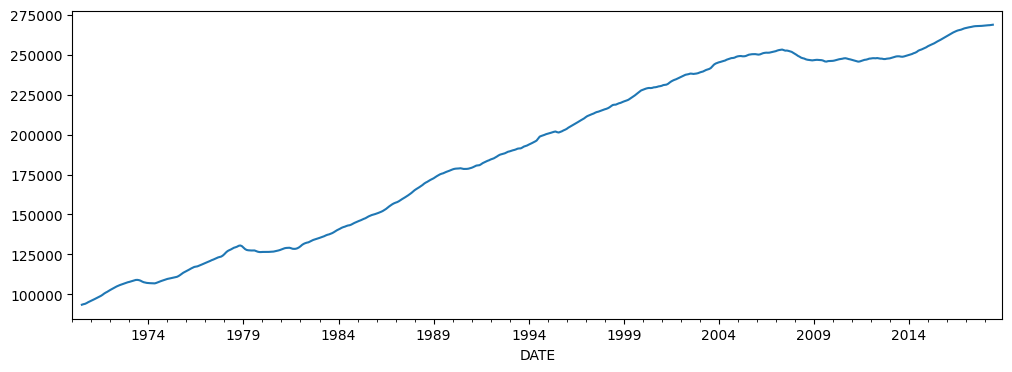

In [8]:
results.trend.plot(figsize=(12,4))

<AxesSubplot:xlabel='DATE'>

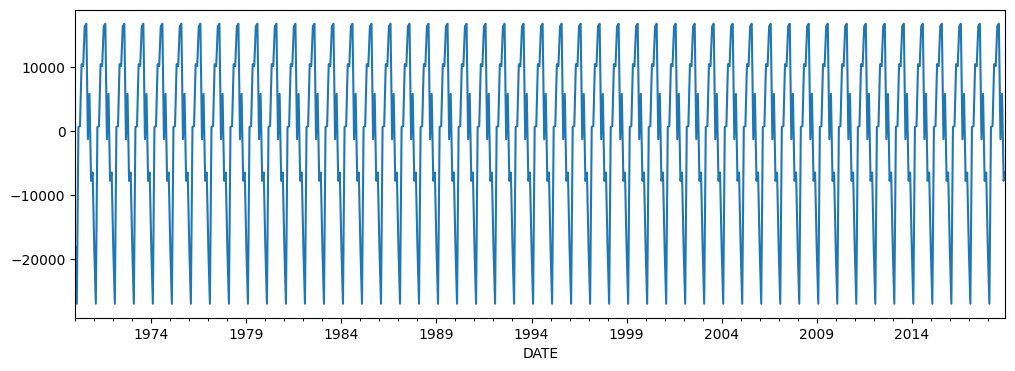

In [9]:
results.seasonal.plot(figsize=(12,4))

<AxesSubplot:xlabel='DATE'>

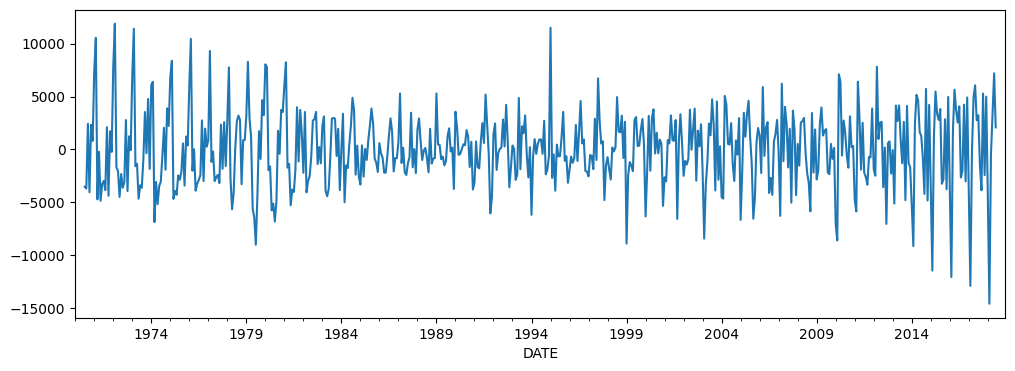

In [10]:
results.resid.plot(figsize=(12,4))

## Train Test Split

**TASK: Figure out the length of the data set**

In [11]:
# CODE HERE
len(df)

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [12]:
# CODE HERE
train = df.iloc[:576]
test = df.iloc[576:]

In [13]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [14]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [15]:
#CODE HERE
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 24
n_features = 1
generator = TimeseriesGenerator(
    data=scaled_train,
    targets=scaled_train,
    length=n_input,
    batch_size=1
)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(LSTM(units=150,
               activation='relu',
               input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [19]:
# CODE HERE
model.fit_generator(generator=generator,
                    epochs=30)

Epoch 1/30


c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\.venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


552/552 [==============================] - 5s 7ms/step - loss: 0.0114
Epoch 2/30
552/552 [==============================] - 3s 6ms/step - loss: 0.0065
Epoch 3/30
552/552 [==============================] - 4s 6ms/step - loss: 0.0055
Epoch 4/30
552/552 [==============================] - 3s 6ms/step - loss: 0.0058
Epoch 5/30
552/552 [==============================] - 4s 7ms/step - loss: 0.0053
Epoch 6/30
552/552 [==============================] - 4s 7ms/step - loss: 0.0044
Epoch 7/30
552/552 [==============================] - 4s 7ms/step - loss: 0.0030
Epoch 8/30
552/552 [==============================] - 4s 7ms/step - loss: 0.0023
Epoch 9/30
552/552 [==============================] - 4s 7ms/step - loss: 0.0020
Epoch 10/30
552/552 [==============================] - 4s 7ms/step - loss: 0.0020
Epoch 11/30
552/552 [==============================] - 4s 7ms/step - loss: 0.0016
Epoch 12/30
552/552 [==============================] - 4s 7ms/step - loss: 0.0014
Epoch 13/30
552/552 [===============

**TASK: Plot the history of the loss that occured during training.**

In [20]:
model.history.history.keys()

dict_keys(['loss'])

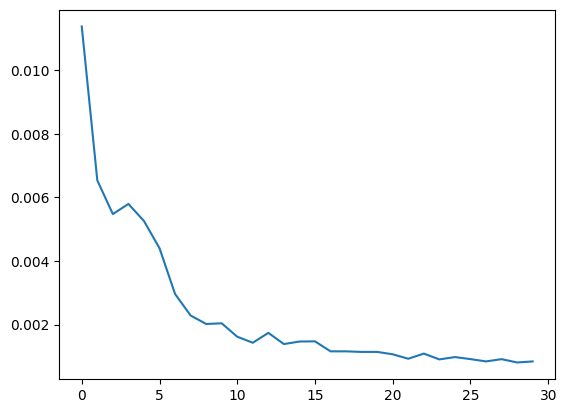

In [21]:
# CODE HERE
# model.history.history['loss']
plt.plot(range(len(model.history.history['loss'])),
         model.history.history['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [22]:
# CODE HERE
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [23]:
first_eval_batch = first_eval_batch.reshape((1, 12, n_features))

**TASK: Generate predictions into the same time stamps as the test set**

In [24]:
# CODE HERE
test_preds = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_preds.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],
                              [[current_pred]],
                              axis=1)

1/1 [==============================] - 0s 31ms/step


## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [25]:
#CODE HERE
true_preds = scaler.inverse_transform(test_preds)
true_preds

array([[248551.04967231],
       [236795.70658708],
       [264621.26219022],
       [270588.33161598],
       [280453.73926967],
       [281526.10100198],
       [286872.94641834],
       [282500.47599846],
       [270740.67897069],
       [279138.06215966],
       [263753.63168174],
       [268500.5585627 ]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [26]:
# CODE HERE
test['Predictions'] = true_preds

c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\.venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
test

,Value,Predictions
DATE,,
2018-01-01,245695.0,248551.049672
2018-02-01,226660.0,236795.706587
2018-03-01,268480.0,264621.262190
2018-04-01,272475.0,270588.331616
2018-05-01,286164.0,280453.739270
2018-06-01,280877.0,281526.101002
2018-07-01,288145.0,286872.946418
2018-08-01,286608.0,282500.475998
2018-09-01,260595.0,270740.678971


**TASK: Plot out the test set against your own predicted values.**

<AxesSubplot:xlabel='DATE'>

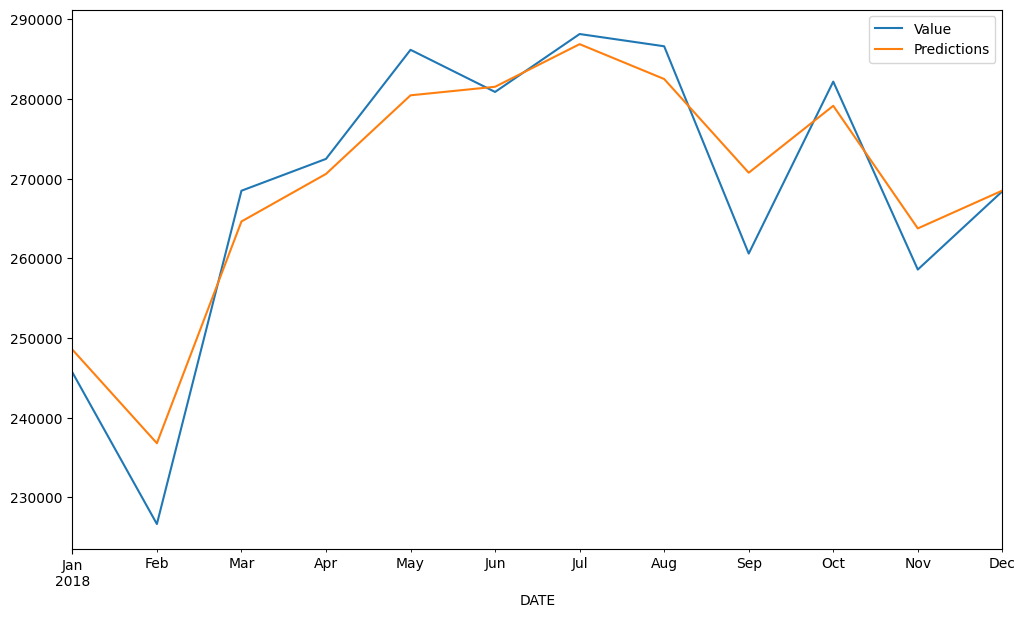

In [28]:
# CODE HERE
test.plot(figsize=(12,7))

# Saving Models

**TASK: Optional, Save your model!**

In [29]:
model.save('RNN_exercise.h5')